In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,date,timedelta

### 1. Load `Table1_Customer_Details` into Pandas

In [2]:
# Load the Excel file to Pandas and list all the sheets

xls = pd.ExcelFile('Spreadsheets_Exercises.xlsx')
xls.sheet_names

['Table1_CustDetails',
 'Table2_ContractType',
 'Table3_PhoneService',
 'Table4_InternetService',
 'Table5_Dates',
 'Table6_Holidays',
 'Table7_Users',
 'Table8_Sparklines']

In [3]:
CustDetails = xls.parse('Table1_CustDetails')
CustDetails.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes


In [4]:
CustDetails.shape

(7049, 12)

In [5]:
CustDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 661.0+ KB


In [6]:
# Check duplicates

CustDetails[CustDetails.duplicated(subset=['customer_id'])]

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
7031,0032-PGELS,Female,0,Yes,Yes,0,1,0,Bank transfer (automatic),30.5,30.50,Yes
7032,0036-IHMOT,Female,0,Yes,Yes,1,2,1,Bank transfer (automatic),103.7,5656.75,No
7033,0040-HALCW,Male,0,Yes,Yes,1,0,2,Credit card (automatic),20.4,1090.60,No
7034,0042-JVWOJ,Male,0,No,No,1,0,1,Bank transfer (automatic),19.6,471.85,No
7035,0042-RLHYP,Female,0,Yes,Yes,1,0,2,Bank transfer (automatic),19.7,1396.90,No
7036,0048-LUMLS,Male,0,Yes,Yes,1,2,1,Credit card (automatic),91.2,3247.55,No


### 2.Compute monthly tenure.

In [7]:
CustDetails['monthly_tenure'] = CustDetails.total_charges/CustDetails.monthly_charges
CustDetails.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,monthly_tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.044207
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.055092
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.800406
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.631122
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.187128


### 3. Ensure the data format of each field is appropriate for data contained.

In [8]:
CustDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
 12  monthly_tenure     7038 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 716.0+ KB


### 4. Remove duplicate customer_id's.

In [9]:
# Check how many unique customer_ids in the data frame

CustDetails.customer_id.nunique()

7043

In [10]:
# Delete the extra row records which have the duplicated customer_id. 

CustDetails.drop_duplicates(subset=['customer_id'],inplace=True, ignore_index=True)
CustDetails.customer_id.nunique()

7043

In [11]:
CustDetails.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,monthly_tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.044207
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.055092
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.800406
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.631122
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.187128


### Using the dates worksheet

In [12]:
dates = xls.parse('Table5_Dates')
dates.head()

,Date,Support Calls,Support Chats,Support Tickets
0,2018-12-01,21,89,69
1,2018-12-02,15,93,80
2,2018-12-03,62,186,197
3,2018-12-04,78,197,150
4,2018-12-05,89,200,158


In [13]:
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             33 non-null     datetime64[ns]
 1   Support Calls    33 non-null     int64         
 2   Support Chats    33 non-null     int64         
 3   Support Tickets  33 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.2 KB


### 1. Add a new column that is the original date formatted as YYYYMMDD and stored as a date.

In [14]:
dates['Formatted Date'] = dates.Date.apply(lambda i: i.strftime('%Y%m%d'))
dates.head()

,Date,Support Calls,Support Chats,Support Tickets,Formatted Date
0,2018-12-01,21,89,69,20181201
1,2018-12-02,15,93,80,20181202
2,2018-12-03,62,186,197,20181203
3,2018-12-04,78,197,150,20181204
4,2018-12-05,89,200,158,20181205


In [15]:
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             33 non-null     datetime64[ns]
 1   Support Calls    33 non-null     int64         
 2   Support Chats    33 non-null     int64         
 3   Support Tickets  33 non-null     int64         
 4   Formatted Date   33 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.4+ KB


### 2.Insert 4 new columns that contain the weekday, day, month, year.

1. Add a new column named 'Weekday'. It will hold the number weekdays converted from dates using `Series.dt.weekday`. Monday is 0 and Sunday is 6. 
2. Convert the weekdays from numbers to names using `Series.map()`
3. Add new columns named 'Year', 'Month', and 'Day'.

In [16]:
dates['Weekday'] = dates.Date.dt.weekday
dates.head()

,Date,Support Calls,Support Chats,Support Tickets,Formatted Date,Weekday
0,2018-12-01,21,89,69,20181201,5
1,2018-12-02,15,93,80,20181202,6
2,2018-12-03,62,186,197,20181203,0
3,2018-12-04,78,197,150,20181204,1
4,2018-12-05,89,200,158,20181205,2


In [17]:
dates['Weekday'] = dates['Weekday'].map({0:'Monday', 
                                         1:'Tuesday', 
                                         2:'Wednesday', 
                                         3:'Thursday', 
                                         4:'Friday', 
                                         5:'Saturday', 
                                         6:'Sunday'})
dates.head()

,Date,Support Calls,Support Chats,Support Tickets,Formatted Date,Weekday
0,2018-12-01,21,89,69,20181201,Saturday
1,2018-12-02,15,93,80,20181202,Sunday
2,2018-12-03,62,186,197,20181203,Monday
3,2018-12-04,78,197,150,20181204,Tuesday
4,2018-12-05,89,200,158,20181205,Wednesday


In [18]:
dates['Year'] = dates.Date.dt.year
print(dates.Year.dtype)
dates.head()

int64


,Date,Support Calls,Support Chats,Support Tickets,Formatted Date,Weekday,Year
0,2018-12-01,21,89,69,20181201,Saturday,2018
1,2018-12-02,15,93,80,20181202,Sunday,2018
2,2018-12-03,62,186,197,20181203,Monday,2018
3,2018-12-04,78,197,150,20181204,Tuesday,2018
4,2018-12-05,89,200,158,20181205,Wednesday,2018


In [19]:
dates['Month'] = dates.Date.dt.month
print(dates.Month.dtype)
dates.head()

int64


,Date,Support Calls,Support Chats,Support Tickets,Formatted Date,Weekday,Year,Month
0,2018-12-01,21,89,69,20181201,Saturday,2018,12
1,2018-12-02,15,93,80,20181202,Sunday,2018,12
2,2018-12-03,62,186,197,20181203,Monday,2018,12
3,2018-12-04,78,197,150,20181204,Tuesday,2018,12
4,2018-12-05,89,200,158,20181205,Wednesday,2018,12


In [20]:
dates['Day'] = dates.Date.dt.day
print(dates.Day.dtype)
dates.head()

int64


,Date,Support Calls,Support Chats,Support Tickets,Formatted Date,Weekday,Year,Month,Day
0,2018-12-01,21,89,69,20181201,Saturday,2018,12,1
1,2018-12-02,15,93,80,20181202,Sunday,2018,12,2
2,2018-12-03,62,186,197,20181203,Monday,2018,12,3
3,2018-12-04,78,197,150,20181204,Tuesday,2018,12,4
4,2018-12-05,89,200,158,20181205,Wednesday,2018,12,5


### 4. Insert 1 new column that computes the number of workdays from the current date (i.e. current row) through the latest date listed in the table. Reference the holidays table in your computation.

In [21]:
# Find out the latest date in the table

date_max = dates.Date.max()
date_max

Timestamp('2019-01-02 00:00:00')

In [22]:
# Reference the holidays table

holidays = xls.parse('Table6_Holidays')
holidays

,Holidays
0,2018-12-25
1,2019-01-01


In [23]:
# Created a variable named holidays_list that contains the holidays in a string format. 

holidays_list = [i.strftime('%Y-%m-%d') for i in holidays.Holidays]
holidays_list

['2018-12-25', '2019-01-01']

In [24]:
# Compute the workdays using np.busday_count()

dates['Workdays'] = dates.Date.apply(lambda i: np.busday_count(i.strftime('%Y-%m-%d'),
                                                               date_max.strftime('%Y-%m-%d'),
                                                               holidays=holidays_list)) + 1
dates.head()

,Date,Support Calls,Support Chats,Support Tickets,Formatted Date,Weekday,Year,Month,Day,Workdays
0,2018-12-01,21,89,69,20181201,Saturday,2018,12,1,21
1,2018-12-02,15,93,80,20181202,Sunday,2018,12,2,21
2,2018-12-03,62,186,197,20181203,Monday,2018,12,3,21
3,2018-12-04,78,197,150,20181204,Tuesday,2018,12,4,20
4,2018-12-05,89,200,158,20181205,Wednesday,2018,12,5,19


### 4.Insert a new column that contains a 1 if the date is a workday and a 0 if not.

In [25]:
# Create a boolean series that meet the criteria

dates.Weekday.isin(['Saturday','Sunday']).head()

0     True
1     True
2    False
3    False
4    False
Name: Weekday, dtype: bool

In [26]:
dates['Formatted Date'].isin(['20181225','20190101']).head()

0    False
1    False
2    False
3    False
4    False
Name: Formatted Date, dtype: bool

In [27]:
boolean_mask = (dates.Weekday.isin(['Saturday','Sunday'])) | (dates['Formatted Date'].isin(['20181225','20190101']))
boolean_mask.head()

0     True
1     True
2    False
3    False
4    False
dtype: bool

In [28]:
dates['Is Workday'] = boolean_mask
dates.head()

,Date,Support Calls,Support Chats,Support Tickets,Formatted Date,Weekday,Year,Month,Day,Workdays,Is Workday
0,2018-12-01,21,89,69,20181201,Saturday,2018,12,1,21,True
1,2018-12-02,15,93,80,20181202,Sunday,2018,12,2,21,True
2,2018-12-03,62,186,197,20181203,Monday,2018,12,3,21,False
3,2018-12-04,78,197,150,20181204,Tuesday,2018,12,4,20,False
4,2018-12-05,89,200,158,20181205,Wednesday,2018,12,5,19,False


In [29]:
dates['Is Workday'] = dates['Is Workday'].apply(lambda i: 0 if i else 1)
dates.head()

,Date,Support Calls,Support Chats,Support Tickets,Formatted Date,Weekday,Year,Month,Day,Workdays,Is Workday
0,2018-12-01,21,89,69,20181201,Saturday,2018,12,1,21,0
1,2018-12-02,15,93,80,20181202,Sunday,2018,12,2,21,0
2,2018-12-03,62,186,197,20181203,Monday,2018,12,3,21,1
3,2018-12-04,78,197,150,20181204,Tuesday,2018,12,4,20,1
4,2018-12-05,89,200,158,20181205,Wednesday,2018,12,5,19,1


### Using the users worksheet

In [30]:
users = xls.parse('Table7_Users')
users.head()

,customer_id,username,domain.tld
0,7590-VHVEG,Olivia.Smith,gmail.com
1,5575-GNVDE,Emma.Garcia,yahoo.com
2,3668-QPYBK,Ava.Johnson,gmail.com
3,7795-CFOCW,Charlotte.Martinez,icloud.com
4,9237-HQITU,Mia.Williams,gmail.com


### 1.Insert a new column that is a clean version of customer_id, trimming any leading or trailing whitespace. All following tasks using the users table should reference the clean customer_id instead of the original.

In [31]:
users.customer_id.apply(lambda i: len(i)).head()

0    11
1    10
2    10
3    10
4    10
Name: customer_id, dtype: int64

In [32]:
users.customer_id = users.customer_id.str.strip()
users.customer_id.apply(lambda i: len(i)).head()

0    10
1    10
2    10
3    10
4    10
Name: customer_id, dtype: int64

### 2. Split the customer id into 2 columns where the characters before the hyphen are one column and the characters after the hyphen are another. Ensure the data format of these new columns is appropriate for the data contained. This might require multiple steps.

In [33]:
username_split = users.customer_id.str.split('-').to_list()
df = pd.DataFrame(username_split,
                 columns = ['id_numbers','id_letters'])
df.head

<bound method NDFrame.head of    id_numbers id_letters
0        7590      VHVEG
1        5575      GNVDE
2        3668      QPYBK
3        7795      CFOCW
4        9237      HQITU
5        9305      CDSKC
6        1452      KIOVK
7        6713      OKOMC
8        7892      POOKP
9        6388      TABGU
10       9763      GRSKD
11       7469      LKBCI
12       8091      TTVAX
13       0280      XJGEX
14       5129      JLPIS
15       3655      SNQYZ
16       8191      XWSZG
17       9959      WOFKT
18       4190      MFLUW
19       4183      MYFRB
20       8779      QRDMV
21       1680      VDCWW
22       1066      JKSGK
23       4472      LVYGI
24       3638      WEABW>

In [34]:
df.index

RangeIndex(start=0, stop=25, step=1)

In [35]:
users.index

RangeIndex(start=0, stop=25, step=1)

In [36]:
users = pd.merge(users, df, on=users.index, how='inner')
users.head()

,key_0,customer_id,username,domain.tld,id_numbers,id_letters
0,0,7590-VHVEG,Olivia.Smith,gmail.com,7590,VHVEG
1,1,5575-GNVDE,Emma.Garcia,yahoo.com,5575,GNVDE
2,2,3668-QPYBK,Ava.Johnson,gmail.com,3668,QPYBK
3,3,7795-CFOCW,Charlotte.Martinez,icloud.com,7795,CFOCW
4,4,9237-HQITU,Mia.Williams,gmail.com,9237,HQITU


### 3.Add the email address for each customer, using the data available in this table.

In [37]:
"@".join([users.username.iat[0],users['domain.tld'].iat[0]])

'Olivia.Smith@gmail.com'

In [38]:
users['email'] = ["@".join([users.username.iat[i],users['domain.tld'].iat[i]]) for i in users.index]
users.head()

,key_0,customer_id,username,domain.tld,id_numbers,id_letters,email
0,0,7590-VHVEG,Olivia.Smith,gmail.com,7590,VHVEG,Olivia.Smith@gmail.com
1,1,5575-GNVDE,Emma.Garcia,yahoo.com,5575,GNVDE,Emma.Garcia@yahoo.com
2,2,3668-QPYBK,Ava.Johnson,gmail.com,3668,QPYBK,Ava.Johnson@gmail.com
3,3,7795-CFOCW,Charlotte.Martinez,icloud.com,7795,CFOCW,Charlotte.Martinez@icloud.com
4,4,9237-HQITU,Mia.Williams,gmail.com,9237,HQITU,Mia.Williams@gmail.com


### Using your customer details worksheet

In [39]:
CustDetails.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,monthly_tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.044207
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.055092
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.800406
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.631122
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.187128


### 1. Add new columns, is_female, has_churned, has_phone, has_internet, and has_phone_and_internet. Populate these fields with the applicable boolean value (TRUE or FALSE).

In [40]:
CustDetails['is_Female'] = CustDetails.gender.apply(lambda i: True if i == 'Female' else (False if i == 'Male' else "Error"))
CustDetails.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,monthly_tenure,is_Female
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.044207,True
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.055092,False
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.800406,False
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.631122,False
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.187128,True


In [41]:
CustDetails['has_churned'] = CustDetails.churn.map({'No':False,'Yes':True})
CustDetails.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,monthly_tenure,is_Female,has_churned
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.044207,True,False
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.055092,False,False
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.800406,False,True
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.631122,False,True
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.187128,True,True


In [42]:
# Check Table4_InternetService

internet = xls.parse('Table4_InternetService')
internet

,internet_service_id,internet_service_description
0,0,No Internet Service
1,1,DSL
2,2,Fiber Optic


In [43]:
CustDetails['has_internet'] = CustDetails.internet_service.map({0:'False', 1:True, 2:True})
CustDetails.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,monthly_tenure,is_Female,has_churned,has_internet
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.044207,True,False,True
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.055092,False,False,True
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.800406,False,True,True
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.631122,False,True,True
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.187128,True,True,True


In [44]:
phone = xls.parse('Table3_PhoneService')
phone

,phone_service_id,phone_service_description
0,0,No Phone Service
1,1,One Line
2,2,Two or More Lines


In [45]:
CustDetails['has_phone'] = CustDetails.phone_service.map({0:'False', 1:True, 2:True})
CustDetails.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,monthly_tenure,is_Female,has_churned,has_internet,has_phone
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.044207,True,False,True,True
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.055092,False,False,True,True
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.800406,False,True,True,True
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.631122,False,True,True,True
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.187128,True,True,True,True


In [46]:
boolean_phone = (CustDetails.phone_service == 1)|(CustDetails.phone_service == 2)
boolean_phone

0        True
1        True
2        True
3        True
4        True
        ...  
7038     True
7039     True
7040     True
7041     True
7042    False
Name: phone_service, Length: 7043, dtype: bool

In [47]:
boolean_internet = (CustDetails.internet_service == 1)|(CustDetails.internet_service == 2)
boolean_internet

0       True
1       True
2       True
3       True
4       True
        ... 
7038    True
7039    True
7040    True
7041    True
7042    True
Name: internet_service, Length: 7043, dtype: bool

In [48]:
CustDetails['has_phone_and_internet'] = boolean_phone & boolean_internet

In [49]:
CustDetails.tail()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,monthly_tenure,is_Female,has_churned,has_internet,has_phone,has_phone_and_internet
7038,9987-LUTYD,Female,0,No,No,1,1,1,Mailed check,55.15,742.90,No,13.470535,True,False,True,True,True
7039,9992-RRAMN,Male,0,Yes,No,2,2,0,Electronic check,85.10,1873.70,Yes,22.017626,False,True,True,True,True
7040,9992-UJOEL,Male,0,No,No,1,1,0,Mailed check,50.30,92.75,No,1.843936,False,False,True,True,True
7041,9993-LHIEB,Male,0,Yes,Yes,1,1,2,Mailed check,67.85,4627.65,No,68.204127,False,False,True,True,True
7042,9995-HOTOH,Male,0,Yes,Yes,0,1,2,Electronic check,59.00,3707.60,No,62.840678,False,False,True,False,False


### 2. Insert a new column partner_dependents that returns a 0 for no partners and no dependents, 1 indicates partner only, 2 indicates dependents only, 3 indicates partner & dependents.

In [50]:
# if...else (functin) --> apply to rows

CustDetails.iloc[7042]['partner']

'Yes'

In [51]:
def partner_dependents(row):
    if row['partner'] == "No" and row['dependents'] == "No":
        return 0
    elif row['partner'] == "Yes" and row['dependents'] == "No":
        return 1
    elif row['partner'] == "No" and row['dependents'] == "Yes":
        return 2
    elif row['partner'] == "Yes" and row['dependents'] == "Yes":
        return 3
    else:
        return "Value Error"
    
partner_dependents(CustDetails.iloc[7042])

3

In [52]:
CustDetails['partner_dependents'] = CustDetails.apply(partner_dependents,axis=1)
CustDetails.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,monthly_tenure,is_Female,has_churned,has_internet,has_phone,has_phone_and_internet,partner_dependents
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.044207,True,False,True,True,True,3
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.055092,False,False,True,True,True,0
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.800406,False,True,True,True,True,0
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.631122,False,True,True,True,True,1
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.187128,True,True,True,True,True,1


In [53]:
# How do I do data validation? 

### 3. Insert a new field that computes the start date, based on the assumption that the tenure was calculated today. Format the columns to be YYYY-MM-DD.

In [54]:
(date.today() - timedelta(days=CustDetails['monthly_tenure'][1]*30.4)).isoformat()

'2019-11-22'

In [55]:
# Can't use list comprehension due to the NaN vaue in the montly_tenure column. 
CustDetails['monthly_tenure'].hasnans

True

In [56]:
CustDetails.monthly_tenure.iloc[945]

nan

In [57]:
def start_date(tenure):
    if str(tenure) == 'nan':
        return 'Nan'
    else:
        return (date.today() - timedelta(days = tenure*30.4)).isoformat()
    
CustDetails['start_date'] = CustDetails.monthly_tenure.apply(start_date)

In [58]:
CustDetails.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,monthly_tenure,is_Female,has_churned,has_internet,has_phone,has_phone_and_internet,partner_dependents,start_date
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.044207,True,False,True,True,True,3,2019-11-23
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.055092,False,False,True,True,True,0,2019-11-22
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.800406,False,True,True,True,True,0,2020-04-30
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.631122,False,True,True,True,True,1,2019-08-06
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.187128,True,True,True,True,True,1,2020-05-19


### 4. Insert a new column that computes average monthly charges using total_charges and tenure. (do not copy the "monthly_charges" column). Format the data type appropriately. Use a function to validate that your calculations match the original field monthly_charges.

In [59]:
CustDetails['average_monthly'] = CustDetails.total_charges/CustDetails.monthly_tenure
CustDetails.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,churn,monthly_tenure,is_Female,has_churned,has_internet,has_phone,has_phone_and_internet,partner_dependents,start_date,average_monthly
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,...,No,9.044207,True,False,True,True,True,3,2019-11-23,65.6
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,...,No,9.055092,False,False,True,True,True,0,2019-11-22,59.9
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,...,Yes,3.800406,False,True,True,True,True,0,2020-04-30,73.9
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,...,Yes,12.631122,False,True,True,True,True,1,2019-08-06,98.0
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,...,Yes,3.187128,True,True,True,True,True,1,2020-05-19,83.9


### 5. Using the reference tables of contract type, phone service and internet service, add the descriptions of each to your customer details table using vlookups.

In [60]:
contract_type = xls.parse('Table2_ContractType')
contract_type

,contract_id,contract_description
0,0,Month-to-Month
1,1,1 Year
2,2,2 Year


In [61]:
CustDetails['contract_description'] = CustDetails.contract_type.map({0:'Month-to-Month', 
                                                                     1:'1 Year', 
                                                                     2:'2 Year'})

CustDetails.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,monthly_tenure,is_Female,has_churned,has_internet,has_phone,has_phone_and_internet,partner_dependents,start_date,average_monthly,contract_description
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,...,9.044207,True,False,True,True,True,3,2019-11-23,65.6,1 Year
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,...,9.055092,False,False,True,True,True,0,2019-11-22,59.9,Month-to-Month
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,...,3.800406,False,True,True,True,True,0,2020-04-30,73.9,Month-to-Month
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,...,12.631122,False,True,True,True,True,1,2019-08-06,98.0,Month-to-Month
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,...,3.187128,True,True,True,True,True,1,2020-05-19,83.9,Month-to-Month


In [62]:
phone_service = xls.parse('Table3_PhoneService')
phone_service

,phone_service_id,phone_service_description
0,0,No Phone Service
1,1,One Line
2,2,Two or More Lines


In [63]:
CustDetails['phone_description'] = CustDetails.phone_service.map({0:'No Phone Service', 1:'One Line', 2:'Two or More Lines'})

CustDetails.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,is_Female,has_churned,has_internet,has_phone,has_phone_and_internet,partner_dependents,start_date,average_monthly,contract_description,phone_description
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,...,True,False,True,True,True,3,2019-11-23,65.6,1 Year,One Line
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,...,False,False,True,True,True,0,2019-11-22,59.9,Month-to-Month,Two or More Lines
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,...,False,True,True,True,True,0,2020-04-30,73.9,Month-to-Month,One Line
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,...,False,True,True,True,True,1,2019-08-06,98.0,Month-to-Month,One Line
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,...,True,True,True,True,True,1,2020-05-19,83.9,Month-to-Month,One Line


In [64]:
internet_service = xls.parse('Table4_InternetService')
internet_service

,internet_service_id,internet_service_description
0,0,No Internet Service
1,1,DSL
2,2,Fiber Optic


In [65]:
CustDetails['internet_description'] = CustDetails.internet_service.map({0:'No Internet Service', 
                                                                     1:'DSL', 
                                                                     2:'Fiber Optic'})
CustDetails.sample(5)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_churned,has_internet,has_phone,has_phone_and_internet,partner_dependents,start_date,average_monthly,contract_description,phone_description,internet_description
3947,5561-NWEVX,Female,1,Yes,No,2,2,0,Electronic check,79.20,...,True,True,True,True,1,2020-06-18,79.20,Month-to-Month,Two or More Lines,Fiber Optic
2853,4074-SJFFA,Female,0,No,No,1,1,0,Mailed check,54.75,...,True,True,True,True,0,2020-07-24,54.75,Month-to-Month,One Line,DSL
6506,9227-YBAXE,Female,0,Yes,Yes,2,1,2,Bank transfer (automatic),82.50,...,False,True,True,True,3,2015-05-21,82.50,2 Year,Two or More Lines,DSL
4507,6352-TWCAU,Female,0,No,No,2,2,0,Electronic check,86.45,...,True,True,True,True,0,2017-09-23,86.45,Month-to-Month,Two or More Lines,Fiber Optic
71,0115-TFERT,Male,0,Yes,No,2,2,0,Electronic check,111.20,...,True,True,True,True,1,2018-11-29,111.20,Month-to-Month,Two or More Lines,Fiber Optic


## Spreadsheet Visualizations

### 1. What are the average monthly charges for each customer age group (full months of tenure) with each service combination (phone, internet, phone & internet)?

In [66]:
# Does columns phone_service and internet_service have Nan values? 

print(CustDetails.phone_service.hasnans)
print(CustDetails.internet_service.hasnans)

False
False


In [67]:
# 0 represent no phone service; 1 and 2 indicates having phone service
CustDetails.phone_service.unique()

array([1, 2, 0])

In [68]:
CustDetails.internet_service.unique()

array([1, 2, 0])

In [69]:
CustDetails.iloc[0]['phone_service']

1

In [70]:
def service_type(row):
    if row['phone_service'] == 0:
        if row['internet_service'] == 0:
            return 'No Service'
        else:
            return 'internet only'
    if row['phone_service'] != 0:
        if row['internet_service'] == 0:
            return 'phone only'
        else:
            return 'phone & internet'
        
service_type(CustDetails.iloc[100])

'phone only'

In [71]:
CustDetails['service_type'] = CustDetails.apply(service_type, axis=1)
CustDetails.sample(5)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone,has_phone_and_internet,partner_dependents,start_date,average_monthly,contract_description,phone_description,internet_description,service_type
6064,8593-WHYHV,Male,0,No,No,2,2,0,Electronic check,85.30,...,True,True,True,0,2020-05-21,85.30,Month-to-Month,Two or More Lines,Fiber Optic,phone & internet
4581,6463-MVYRY,Female,1,No,No,1,1,2,Bank transfer (automatic),69.85,...,True,True,True,0,2015-11-16,69.85,2 Year,One Line,DSL,phone & internet
6948,9851-QXEEQ,Male,0,No,No,2,2,0,Electronic check,104.70,...,True,True,True,0,2017-03-11,104.70,Month-to-Month,Two or More Lines,Fiber Optic,phone & internet
6332,8966-SNIZF,Female,0,Yes,No,1,0,2,Bank transfer (automatic),19.45,...,False,True,False,1,2015-01-25,19.45,2 Year,One Line,No Internet Service,phone only
3113,4464-JCOLN,Male,0,Yes,Yes,1,0,1,Mailed check,19.85,...,False,True,False,3,2020-06-30,19.85,1 Year,One Line,No Internet Service,phone only


In [72]:
CustDetails.axes

[RangeIndex(start=0, stop=7043, step=1),
 Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
        'phone_service', 'internet_service', 'contract_type', 'payment_type',
        'monthly_charges', 'total_charges', 'churn', 'monthly_tenure',
        'is_Female', 'has_churned', 'has_internet', 'has_phone',
        'has_phone_and_internet', 'partner_dependents', 'start_date',
        'average_monthly', 'contract_description', 'phone_description',
        'internet_description', 'service_type'],
       dtype='object')]

In [73]:
CustDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7043 non-null   object 
 1   gender                  7043 non-null   object 
 2   is_senior_citizen       7043 non-null   int64  
 3   partner                 7043 non-null   object 
 4   dependents              7043 non-null   object 
 5   phone_service           7043 non-null   int64  
 6   internet_service        7043 non-null   int64  
 7   contract_type           7043 non-null   int64  
 8   payment_type            7043 non-null   object 
 9   monthly_charges         7043 non-null   float64
 10  total_charges           7032 non-null   float64
 11  churn                   7043 non-null   object 
 12  monthly_tenure          7032 non-null   float64
 13  is_Female               7043 non-null   bool   
 14  has_churned             7043 non-null   

In [74]:
# Choose columns that I need

mytable_customer_details = CustDetails.iloc[:, [0,2,3,4,9,10,12,13,14,24]]
mytable_customer_details.sample(5)

,customer_id,is_senior_citizen,partner,dependents,monthly_charges,total_charges,monthly_tenure,is_Female,has_churned,service_type
4781,6728-CZFEI,0,No,No,56.15,931.90,16.596616,True,False,phone & internet
4449,6267-DCFFZ,1,Yes,No,90.05,2627.20,29.174903,True,False,phone & internet
6839,9714-EDSUC,0,No,No,94.90,360.55,3.799262,False,False,phone & internet
5372,7586-ZATGZ,0,No,No,84.90,3369.05,39.682568,False,False,phone & internet
5625,7926-IJOOU,0,No,No,19.30,19.30,1.000000,False,False,phone only


In [75]:
mytable_customer_details.monthly_tenure.hasnans

True

In [76]:
mytable_customer_details.index

RangeIndex(start=0, stop=7043, step=1)

In [77]:
for i in mytable_customer_details.index:
    if str(mytable_customer_details.iloc[i]['monthly_tenure']) == 'nan':
        print(mytable_customer_details.iloc[i])

customer_id             1371-DWPAZ
is_senior_citizen                0
partner                        Yes
dependents                     Yes
monthly_charges              56.05
total_charges                  NaN
monthly_tenure                 NaN
is_Female                     True
has_churned                  False
service_type         internet only
Name: 945, dtype: object
customer_id          2520-SGTTA
is_senior_citizen             0
partner                     Yes
dependents                  Yes
monthly_charges              20
total_charges               NaN
monthly_tenure              NaN
is_Female                  True
has_churned               False
service_type         phone only
Name: 1731, dtype: object
customer_id                2775-SEFEE
is_senior_citizen                   0
partner                            No
dependents                        Yes
monthly_charges                  61.9
total_charges                     NaN
monthly_tenure                    NaN
is_Female    

In [78]:
for i in mytable_customer_details.index:
    if str(mytable_customer_details.iloc[i]['monthly_tenure']) == 'nan':
        mytable_customer_details.monthly_tenure.iloc[i] = 1

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
mytable_customer_details.monthly_tenure.hasnans

False

In [80]:
mytable_customer_details['monthly_tenure'] = mytable_customer_details.monthly_tenure.apply(lambda i: int(i))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
mytable_customer_details.sample(5)

,customer_id,is_senior_citizen,partner,dependents,monthly_charges,total_charges,monthly_tenure,is_Female,has_churned,service_type
791,1154-HYWWO,0,No,No,70.60,2708.20,38,False,False,phone & internet
5184,7294-TMAOP,0,No,No,90.55,90.55,1,True,True,phone & internet
6069,8603-IJWDN,0,No,No,86.60,86.60,1,False,True,phone & internet
3346,4770-QAZXN,0,No,No,19.45,232.10,11,True,False,phone only
5375,7590-VHVEG,0,Yes,No,29.85,29.85,1,True,False,internet only


In [155]:
mytable_customer_details.groupby(['monthly_tenure','service_type']).monthly_charges.mean()

monthly_tenure  service_type    
1               internet only       31.330667
                phone & internet    67.276715
                phone only          20.168844
2               internet only       32.881250
                phone & internet    71.880921
                                      ...    
75              internet only       60.475000
                phone only          24.275000
76              phone only          22.375000
77              phone only          22.700000
79              phone only          19.750000
Name: monthly_charges, Length: 227, dtype: float64

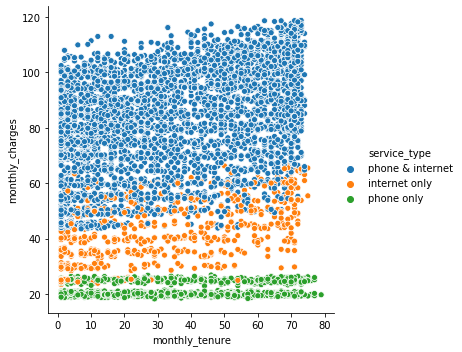

In [126]:
sns.relplot(x='monthly_tenure', y='monthly_charges',data=mytable_customer_details,hue='service_type')

In [101]:
# create the pivot table

table = pd.pivot_table(mytable_customer_details, 
                       values = ['monthly_charges'], 
                       index = ['monthly_tenure'], 
                       columns = ['service_type'], 
                       aggfunc=np.mean,
                       fill_value = 0)
table

monthly_charges                            
service_type     internet only phone & internet phone only
monthly_tenure                                            
1                    31.330667        67.276715  20.168844
2                    32.881250        71.880921  20.064103
3                    33.109259        74.074180  20.504054
4                    37.656250        71.781304  20.611429
5                    41.729167        78.469737  20.536207
...                        ...              ...        ...
74                   62.025000        94.712500  23.563636
75                   60.475000         0.000000  24.275000
76                    0.000000         0.000000  22.375000
77                    0.000000         0.000000  22.700000
79                    0.000000         0.000000  19.750000

[78 rows x 3 columns]

In [144]:
print(table.index)
print()
print(table.index.name)
print()
print(table.columns)
print()
print(table.columns.name)

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72, 73, 74, 75, 76, 77, 79],
           dtype='int64', name='monthly_tenure')

monthly_tenure

MultiIndex([('monthly_charges',    'internet only'),
            ('monthly_charges', 'phone & internet'),
            ('monthly_charges',       'phone only')],
           names=[None, 'service_type'])

None


In [ ]:
sns.relplot(x=table.monthly_charges.index, y='internet only', data=table.monthly_charges)

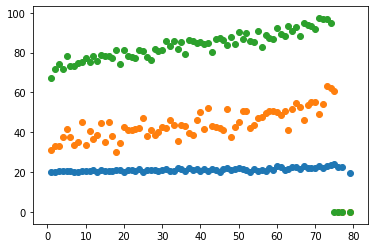

In [157]:
plt.scatter(table.index, table['monthly_charges','phone only'])
plt.scatter(table.index, table['monthly_charges','internet only'])
plt.scatter(table.index, table['monthly_charges', 'phone & internet'])

### 2. Create a transposed copy of the table above, i.e. where rows are the service type and columns are the tenure months.

In [161]:
trans_table = table.T
trans_table

monthly_tenure                           1          2          3          4   \
                service_type                                                   
monthly_charges internet only     31.330667  32.881250  33.109259  37.656250   
                phone & internet  67.276715  71.880921  74.074180  71.781304   
                phone only        20.168844  20.064103  20.504054  20.611429   

monthly_tenure                           5          6          7          8   \
                service_type                                                   
monthly_charges internet only     41.729167  37.862500  33.517647  35.130000   
                phone & internet  78.469737  73.263924  73.172727  74.651163   
                phone only        20.536207  20.806000  20.219565  20.156667   

monthly_tenure                           9          10  ...         69  \
                service_type                            ...              
monthly_charges internet only     45.131250  33.565000  ...  55.011765   
                phone & internet  75.090909  77.506944  ...  93.154706   
                phone only        20.705357  20.516667  ...  22.212963   

monthly_tenure                           70         71         72         73  \
                service_type                                                   
monthly_charges internet only     54.976471  49.108333  53.938889  63.278571   
                phone & internet  91.663182  97.243015  96.589524  96.692708   
                phone only        22.316667  23.196154  22.317857  23.208333   

monthly_tenure                           74      75      76    77     79  
                service_type                                              
monthly_charges internet only     62.025000  60.475   0.000   0.0   0.00  
                phone & internet  94.712500   0.000   0.000   0.0   0.00  
                phone only        23.563636  24.275  22.375  22.7  19.75  

[3 rows x 78 columns]

In [167]:
trans_table.index

MultiIndex([('monthly_charges',    'internet only'),
            ('monthly_charges', 'phone & internet'),
            ('monthly_charges',       'phone only')],
           names=[None, 'service_type'])

In [169]:
trans_table.columns

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72, 73, 74, 75, 76, 77, 79],
           dtype='int64', name='monthly_tenure')